In [25]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import preprocess_input
import keras.backend as be

In [6]:
model = VGG16()

553467904/553467096 [==============================] - 305s 1us/step


In [7]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [8]:
for layer in model.layers:
    layer.trainable = False

In [9]:
for layer in model.layers:
    print(layer.trainable)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


In [13]:
image = load_img("banana.jpg", target_size =(224,224))

In [14]:
im_array = img_to_array(image)

In [15]:
im_array.shape

(224, 224, 3)

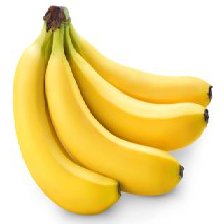

In [16]:
image

In [19]:
be.image_data_format()

'channels_last'

In [20]:
im_array = im_array.reshape(1, 224, 224, 3)

In [26]:
im_final = preprocess_input(im_array)

In [27]:
yhat = model.predict(im_final)

In [28]:
yhat.shape

(1, 1000)

In [29]:
answer = decode_predictions(yhat)

40960/35363 [==================================] - 0s 1us/step


In [30]:
answer

[[('n07753592', 'banana', 0.96356875),
  ('n03065424', 'coil', 0.004419436),
  ('n03627232', 'knot', 0.0021303238),
  ('n07747607', 'orange', 0.0015406398),
  ('n07749582', 'lemon', 0.0013128975)]]